In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

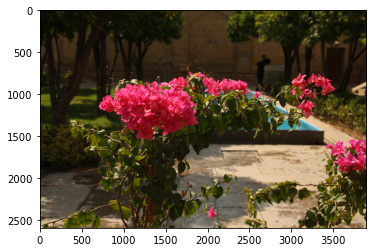

In [2]:
im_path = "../../Examples/set1/IMG_0720.jpg"
im = cv2.cvtColor(plt.imread(im_path), cv2.COLOR_BGR2GRAY)
im = plt.imread(im_path)

plt.imshow(im)


### Apply apply GaussianBlur on your images with kernel size 33 and 55

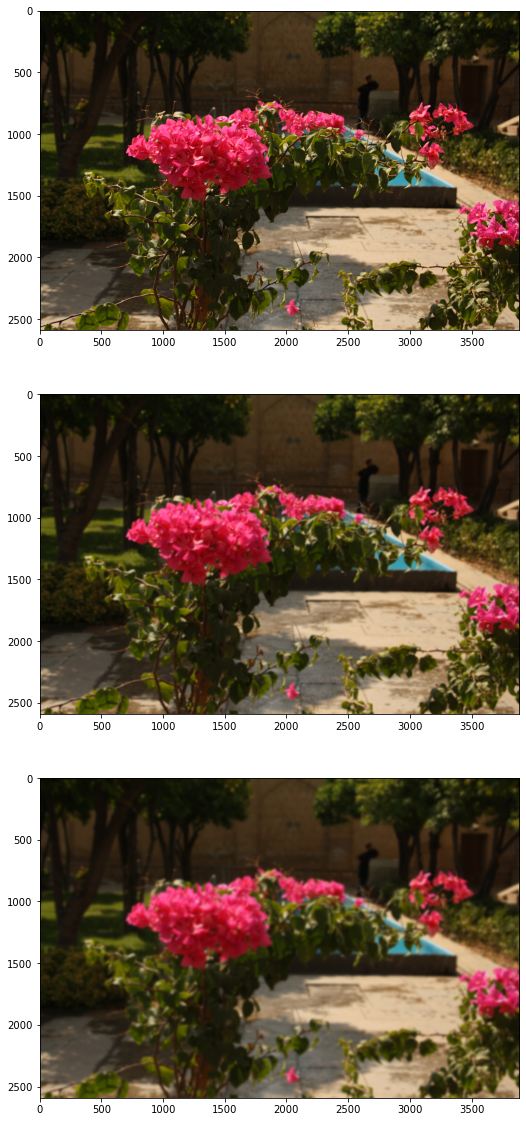

In [3]:
image1 = cv2.GaussianBlur(im,(33, 33), 0)
image2 = cv2.GaussianBlur(im,(55, 55), 0)

fig,ax = plt.subplots(3,1, figsize=(10,20))
ax[0].imshow(im)
ax[1].imshow(image1)
ax[2].imshow(image2)


### Use the functions in the utils.ipynb to calcuate the entropy, am_power, and energy, of the original images and the filtered images

In [4]:
def am_entropy(nimg , N=256):
    M = nimg.shape
    ssz = M[0] * M[1]
    hist,bins = np.histogram(nimg.flatten(),N,[0,N])
    hist = hist / ssz
    ent = -np.sum( hist * np.log2(hist+0.0001))
    return ent

def am_power(a):
    pa = 0.0 
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                pa += a[i,j]**2
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                for k in range(dim1[2]):
                    pa += a[i,j,k]**2
    pa = pa / sz
    return pa

def am_energy(a):
    pa = 0.0 
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                pa += a[i,j]**2
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                for k in range(dim1[2]):
                    pa += a[i,j,k]**2
    return pa

In [5]:
am_entropy(im), am_power(im), am_energy(im)

(16.995239788606373, 7078.554015951, 214006546477.0)

In [6]:
am_entropy(image1), am_power(image1), am_energy(image1)

(17.002702017548245, 6805.698778073877, 205757290059.0)

In [7]:
am_entropy(image2), am_power(image2), am_energy(image2)

(16.977017223839574, 6674.301022740383, 201784730159.0)

### Can you find a way to calcuate the energy and power faster

In [8]:
print('image power=', (im.astype(np.float32)**2).sum())
print('image energy=', (im.astype(np.float32)**2).mean())


image power= 214006840000.0
image energy= 7078.564


### Apply this kernel1 on your image. Then apply it again. Visualize the images and calcuate the entropy, energy and power.

In [9]:
kernel1 = np.array([[18, 8, 0], 
                    [8, 1, -8],
                    [0, -8, -18]])
image3=cv2.filter2D(im, -1, kernel1)
image4=cv2.filter2D(image3, -1, kernel1)



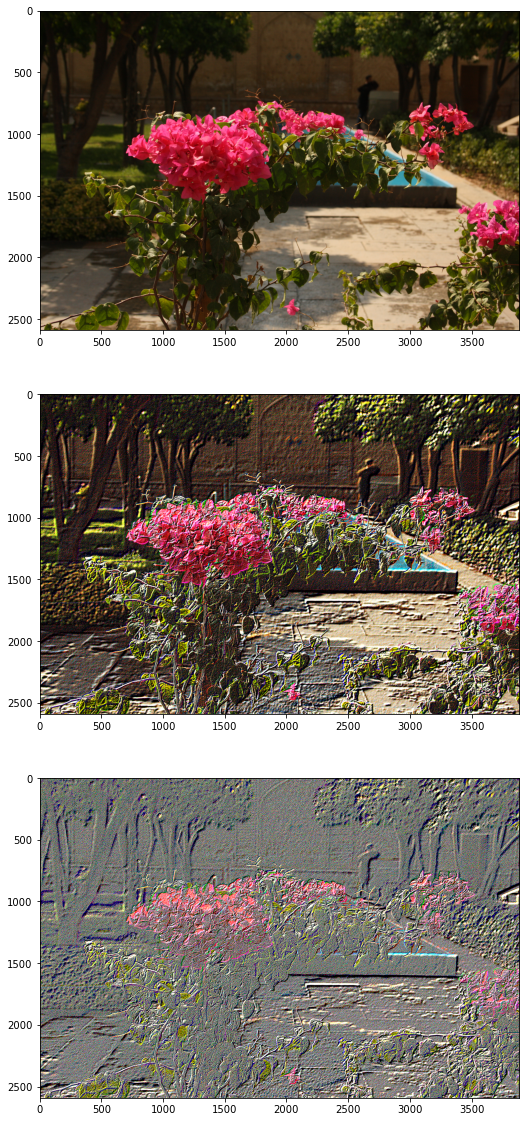

In [10]:
fig,ax = plt.subplots(3,1, figsize=(10,20))
ax[0].imshow(im)
ax[1].imshow(image3)
ax[2].imshow(image4)


In [11]:
am_entropy(im), ('image power=', (im.astype(np.float32)**2).sum()), ('image energy=', (im.astype(np.float32)**2).mean())

(16.995239788606373,
 ('image power=', 214006840000.0),
 ('image energy=', 7078.564))

In [12]:
am_entropy(image3), ('image power=', (image3.astype(np.float32)**2).sum()), ('image energy=', (image3.astype(np.float32)**2).mean())

(12.459639785268422,
 ('image power=', 415857280000.0),
 ('image energy=', 13755.038))

In [13]:
am_entropy(image4), ('image power=', (image4.astype(np.float32)**2).sum()), ('image energy=', (image4.astype(np.float32)**2).mean())

(0.1756541020756952,
 ('image power=', 889463960000.0),
 ('image energy=', 29420.215))

In [14]:
am_entropy(image4), am_power(image4), am_energy(image4)

(0.1756541020756952, 29420.225311651924, 889464260827.0)

### Try on other filters you like to use